a)Compute the output of a quantum circuit.
Consider the following quantum Circuits on Two Qubits.

|0>-H-*---+---
      |   |
|1>---+-Z-*-H-

b)proof that the order of unitary compositions is crucial in quantum operations considering the combination of hadamard phase gate and T-gate.

In [5]:
# Import required libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_multivector, circuit_drawer
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')



### Visualize the Given Quantum Circuit
This cell creates the exact circuit from the image:
1. Initialize qubit 0 to |0⟩ and qubit 1 to |1⟩
2. Apply H gate to qubit 0
3. Apply CNOT (control=0, target=1)
4. Apply Z gate to qubit 1
5. Apply CNOT (control=1, target=0)
6. Apply H gate to qubit 1

We'll visualize it using matplotlib drawer for a clear diagram.

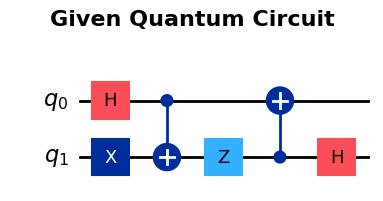

Circuit created and visualized successfully!


In [6]:
# Create the quantum circuit
qc = QuantumCircuit(2)

# Initialize qubit 1 to |1⟩ (qubit 0 is already |0⟩ by default)
qc.x(1)

# Apply the gates as per the circuit
qc.h(0)                    # Hadamard on qubit 0
qc.cx(0, 1)                # CNOT: control=0, target=1
qc.z(1)                    # Z gate on qubit 1
qc.cx(1, 0)                # CNOT: control=1, target=0
qc.h(1)                    # Hadamard on qubit 1

# Visualize the circuit
fig = qc.draw('mpl', style='iqp')
fig.suptitle('Given Quantum Circuit', fontsize=16, fontweight='bold')
fig.tight_layout()
display(fig)
plt.close(fig)

print("Circuit created and visualized successfully!")

### Part (a): Compute the Output of the Quantum Circuit
We'll compute:
1. **Initial State**: |0⟩ ⊗ |1⟩ = |01⟩
2. **Final State**: After applying all gates
3. Display both states in computational basis

In [7]:
# Initial state: |01⟩ (qubit 0 = |0⟩, qubit 1 = |1⟩)
initial_state = Statevector.from_label('01')

print("=" * 60)
print("PART (a): COMPUTE THE OUTPUT OF THE QUANTUM CIRCUIT")
print("=" * 60)
print("\nInitial State: |01⟩")
print("\nInitial State Vector:")
print(initial_state)

# Create circuit for computation (same as above)
qc_compute = QuantumCircuit(2)
qc_compute.x(1)  # Initialize to |01⟩
qc_compute.h(0)
qc_compute.cx(0, 1)
qc_compute.z(1)
qc_compute.cx(1, 0)
qc_compute.h(1)

# Compute final state
final_state = initial_state.evolve(qc_compute)

print("\n" + "-" * 60)
print("Final State Vector:")
print(final_state)

# Display probabilities
print("\n" + "-" * 60)
print("Measurement Probabilities:")
probs = final_state.probabilities_dict()
for state, prob in sorted(probs.items()):
    if prob > 1e-10:  # Only show non-zero probabilities
        print(f"  |{state}⟩: {prob:.6f} ({prob*100:.2f}%)")

PART (a): COMPUTE THE OUTPUT OF THE QUANTUM CIRCUIT

Initial State: |01⟩

Initial State Vector:
Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))

------------------------------------------------------------
Final State Vector:
Statevector([ 0.00000000e+00+0.j, -1.00000000e+00+0.j,  0.00000000e+00+0.j,
              2.23711432e-17+0.j],
            dims=(2, 2))

------------------------------------------------------------
Measurement Probabilities:
  |01⟩: 1.000000 (100.00%)


### Visualize States on Bloch Sphere
We'll visualize both qubits' states:
- **Initial State**: Before applying any gates
- **Final State**: After all gates are applied

The Bloch sphere representation helps understand the quantum state geometrically.

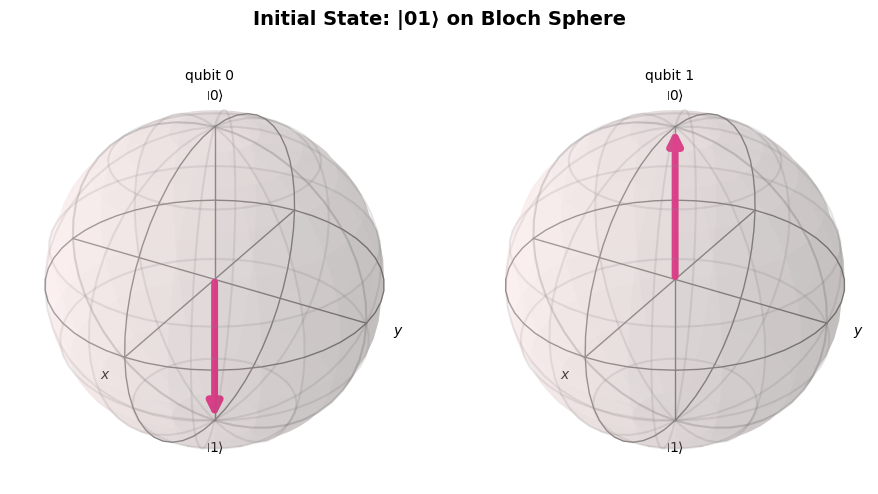

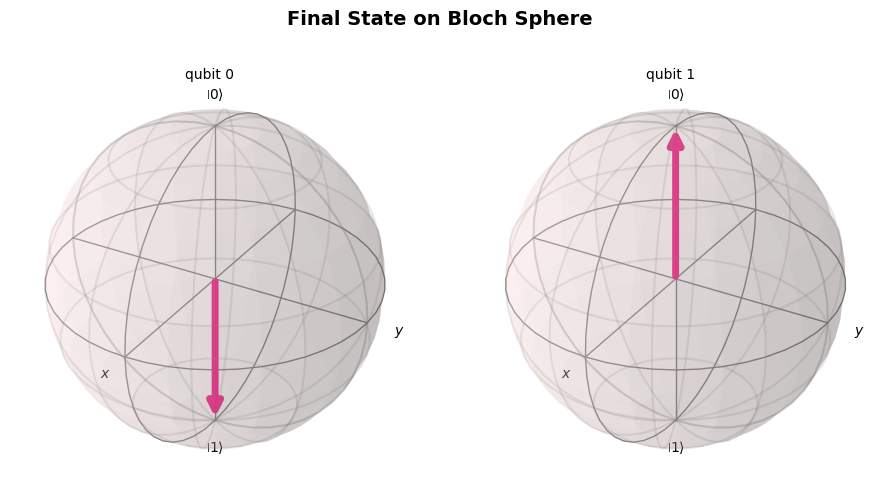

Bloch sphere visualizations displayed successfully!


In [8]:
# Visualize initial state
fig1 = plot_bloch_multivector(initial_state)
fig1.suptitle('Initial State: |01⟩ on Bloch Sphere', fontsize=14, fontweight='bold', y=1.02)
fig1.tight_layout()
display(fig1)
plt.close(fig1)

# Visualize final state
fig2 = plot_bloch_multivector(final_state)
fig2.suptitle('Final State on Bloch Sphere', fontsize=14, fontweight='bold', y=1.02)
fig2.tight_layout()
display(fig2)
plt.close(fig2)

print("Bloch sphere visualizations displayed successfully!")

### Step-by-Step State Evolution
We'll track how the quantum state evolves after each gate operation.
This helps understand the transformation at each step.

In [9]:
print("=" * 70)
print("STEP-BY-STEP STATE EVOLUTION")
print("=" * 70)

# Start with initial state
state = Statevector.from_label('01')
print(f"\nStep 0 - Initial State |01⟩:")
print(f"  {state}\n")

# Apply gates step by step
gates_description = [
    ("H on qubit 0", QuantumCircuit(2)),
    ("CNOT(0→1)", QuantumCircuit(2)),
    ("Z on qubit 1", QuantumCircuit(2)),
    ("CNOT(1→0)", QuantumCircuit(2)),
    ("H on qubit 1", QuantumCircuit(2))
]

# Initialize each circuit with X on qubit 1
for desc, circ in gates_description:
    circ.x(1)

# Add the specific gate to each circuit
gates_description[0][1].h(0)
gates_description[1][1].cx(0, 1)
gates_description[2][1].z(1)
gates_description[3][1].cx(1, 0)
gates_description[4][1].h(1)

# Evolve and print
qc_evolution = QuantumCircuit(2)
qc_evolution.x(1)

for i, (desc, gate_circ) in enumerate(gates_description, 1):
    # Get just the last gate added
    if i == 1:
        qc_evolution.h(0)
    elif i == 2:
        qc_evolution.cx(0, 1)
    elif i == 3:
        qc_evolution.z(1)
    elif i == 4:
        qc_evolution.cx(1, 0)
    elif i == 5:
        qc_evolution.h(1)
    
    state = Statevector.from_label('01').evolve(qc_evolution)
    print(f"Step {i} - After {desc}:")
    
    # Show probabilities
    probs = state.probabilities_dict()
    for basis_state, prob in sorted(probs.items()):
        if prob > 1e-10:
            amplitude = state.data[int(basis_state, 2)]
            print(f"  |{basis_state}⟩: {amplitude:.4f} (probability: {prob:.4f})")
    print()

STEP-BY-STEP STATE EVOLUTION

Step 0 - Initial State |01⟩:
  Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))

Step 1 - After H on qubit 0:
  |10⟩: 0.7071+0.0000j (probability: 0.5000)
  |11⟩: -0.7071+0.0000j (probability: 0.5000)

Step 2 - After CNOT(0→1):
  |01⟩: -0.7071+0.0000j (probability: 0.5000)
  |10⟩: 0.7071+0.0000j (probability: 0.5000)

Step 3 - After Z on qubit 1:
  |01⟩: -0.7071+0.0000j (probability: 0.5000)
  |10⟩: -0.7071+0.0000j (probability: 0.5000)

Step 4 - After CNOT(1→0):
  |01⟩: -0.7071+0.0000j (probability: 0.5000)
  |11⟩: -0.7071+0.0000j (probability: 0.5000)

Step 5 - After H on qubit 1:
  |01⟩: -1.0000+0.0000j (probability: 1.0000)



### Part (b): Prove Order of Unitary Compositions is Crucial
We'll demonstrate that quantum gates don't always commute by comparing different orderings of:
- **H gate** (Hadamard)
- **S gate** (Phase gate, also called P gate)
- **T gate**

We'll create two circuits with different gate orders and show they produce different results.

In [10]:
print("=" * 70)
print("PART (b): PROVING ORDER OF OPERATIONS MATTERS")
print("=" * 70)
print("\nWe'll compare two different orderings of H, S, and T gates:")
print("  Circuit 1: H → S → T")
print("  Circuit 2: T → S → H")
print("  (Both starting from |0⟩)")


PART (b): PROVING ORDER OF OPERATIONS MATTERS

We'll compare two different orderings of H, S, and T gates:
  Circuit 1: H → S → T
  Circuit 2: T → S → H
  (Both starting from |0⟩)


### Create Two Circuits with Different Gate Orders
- **Circuit 1**: Apply H, then S, then T
- **Circuit 2**: Apply T, then S, then H

Both circuits use the same gates but in different orders.


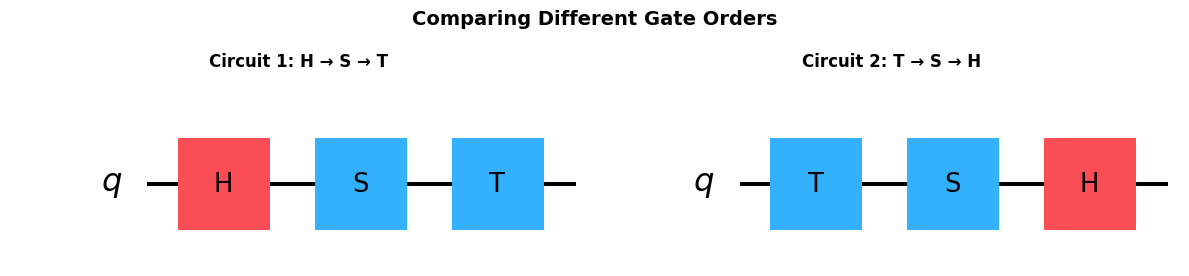

Both circuits visualized successfully!


In [11]:
# Circuit 1: H → S → T
circuit1 = QuantumCircuit(1, name='H→S→T')
circuit1.h(0)
circuit1.s(0)
circuit1.t(0)

# Circuit 2: T → S → H (reverse order)
circuit2 = QuantumCircuit(1, name='T→S→H')
circuit2.t(0)
circuit2.s(0)
circuit2.h(0)

# Visualize both circuits side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# Draw circuit 1
circuit1.draw('mpl', ax=axes[0], style='iqp')
axes[0].set_title('Circuit 1: H → S → T', fontsize=12, fontweight='bold')

# Draw circuit 2
circuit2.draw('mpl', ax=axes[1], style='iqp')
axes[1].set_title('Circuit 2: T → S → H', fontsize=12, fontweight='bold')

fig.suptitle('Comparing Different Gate Orders', fontsize=14, fontweight='bold')
fig.tight_layout()
display(fig)
plt.close(fig)

print("Both circuits visualized successfully!")

### Compute Final States for Both Circuits
We'll:
1. Start both circuits from |0⟩
2. Compute the final state after all gates
3. Compare the results to prove they're different

In [12]:
# Initial state |0⟩
initial = Statevector.from_label('0')

# Compute final states
final1 = initial.evolve(circuit1)
final2 = initial.evolve(circuit2)

print("\n" + "=" * 70)
print("FINAL STATES COMPARISON")
print("=" * 70)

print("\nCircuit 1 (H → S → T) Final State:")
print(final1)
print("\nProbabilities:")
for state, prob in final1.probabilities_dict().items():
    if prob > 1e-10:
        print(f"  |{state}⟩: {prob:.6f}")

print("\n" + "-" * 70)

print("\nCircuit 2 (T → S → H) Final State:")
print(final2)
print("\nProbabilities:")
for state, prob in final2.probabilities_dict().items():
    if prob > 1e-10:
        print(f"  |{state}⟩: {prob:.6f}")

print("\n" + "-" * 70)

# Check if states are equal
fidelity = np.abs(np.vdot(final1.data, final2.data))**2
print(f"\nFidelity between states: {fidelity:.6f}")

if fidelity < 0.9999:
    print("✓ PROVEN: The states are DIFFERENT!")
    print("  This proves that the ORDER of quantum gates matters!")
else:
    print("✗ The states are the same (gates commute in this case)")


FINAL STATES COMPARISON

Circuit 1 (H → S → T) Final State:
Statevector([ 0.70710678+0.j , -0.5       +0.5j],
            dims=(2,))

Probabilities:
  |0⟩: 0.500000
  |1⟩: 0.500000

----------------------------------------------------------------------

Circuit 2 (T → S → H) Final State:
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))

Probabilities:
  |0⟩: 0.500000
  |1⟩: 0.500000

----------------------------------------------------------------------

Fidelity between states: 0.146447
✓ PROVEN: The states are DIFFERENT!
  This proves that the ORDER of quantum gates matters!


### Visualize Both Final States on Bloch Sphere
The Bloch sphere visualization clearly shows how different gate orderings 
lead to different final quantum states geometrically.


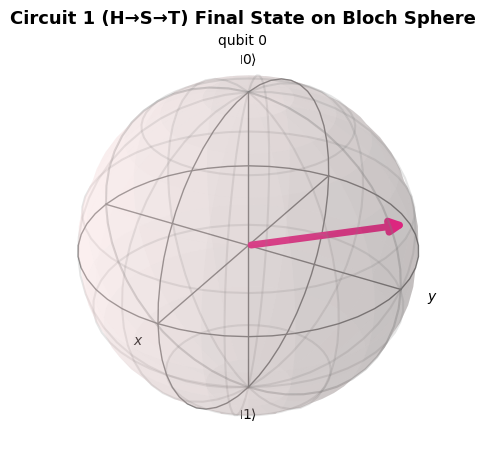

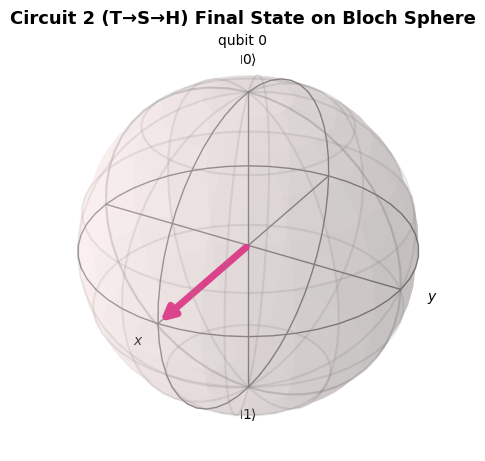

Bloch sphere comparison displayed successfully!

✓ VISUAL PROOF:
  Notice how the quantum states point in DIFFERENT directions
  on the Bloch sphere!

  This geometrically proves that:
    • H→S→T produces a different state than T→S→H
    • Gate order MATTERS in quantum computing
    • Quantum gates do NOT always commute


In [18]:
# Visualize Circuit 1 final state
fig1 = plot_bloch_multivector(final1)
fig1.suptitle('Circuit 1 (H→S→T) Final State on Bloch Sphere', 
              fontsize=13, fontweight='bold', y=0.95)
fig1.tight_layout()
display(fig1)
plt.close(fig1)

# Visualize Circuit 2 final state
fig2 = plot_bloch_multivector(final2)
fig2.suptitle('Circuit 2 (T→S→H) Final State on Bloch Sphere', 
              fontsize=13, fontweight='bold', y=0.95)
fig2.tight_layout()
display(fig2)
plt.close(fig2)

print("=" * 70)
print("Bloch sphere comparison displayed successfully!")
print("=" * 70)
print("\n✓ VISUAL PROOF:")
print("  Notice how the quantum states point in DIFFERENT directions")
print("  on the Bloch sphere!")
print("\n  This geometrically proves that:")
print("    • H→S→T produces a different state than T→S→H")
print("    • Gate order MATTERS in quantum computing")
print("    • Quantum gates do NOT always commute")
print("=" * 70)

### Compare Unitary Matrices
We'll compute and compare the overall unitary matrices for both gate sequences.
If the matrices are different, this mathematically proves that gate order matters.

In [14]:
print("=" * 70)
print("UNITARY MATRIX COMPARISON")
print("=" * 70)

# Get unitary operators
U1 = Operator(circuit1)
U2 = Operator(circuit2)

print("\nCircuit 1 (H → S → T) Unitary Matrix:")
print(U1.data)

print("\n" + "-" * 70)

print("\nCircuit 2 (T → S → H) Unitary Matrix:")
print(U2.data)

print("\n" + "-" * 70)

# Check if matrices are equal
matrices_equal = np.allclose(U1.data, U2.data)
print(f"\nAre the unitary matrices equal? {matrices_equal}")

if not matrices_equal:
    print("\n✓ MATHEMATICAL PROOF:")
    print("  U₁ ≠ U₂")
    print("  Therefore: (H·S·T) ≠ (T·S·H)")
    print("  This proves quantum gates do NOT always commute!")
    
    # Calculate difference
    diff = np.linalg.norm(U1.data - U2.data)
    print(f"\n  Matrix difference (Frobenius norm): {diff:.6f}")

UNITARY MATRIX COMPARISON

Circuit 1 (H → S → T) Unitary Matrix:
[[ 0.70710678+0.j   0.70710678+0.j ]
 [-0.5       +0.5j  0.5       -0.5j]]

----------------------------------------------------------------------

Circuit 2 (T → S → H) Unitary Matrix:
[[ 0.70710678+0.j  -0.5       +0.5j]
 [ 0.70710678+0.j   0.5       -0.5j]]

----------------------------------------------------------------------

Are the unitary matrices equal? False

✓ MATHEMATICAL PROOF:
  U₁ ≠ U₂
  Therefore: (H·S·T) ≠ (T·S·H)
  This proves quantum gates do NOT always commute!

  Matrix difference (Frobenius norm): 1.847759


### Create Summary Visualization
Generate a comprehensive visual summary showing:
1. The original circuit output
2. The difference between the two gate orderings
3. Probability distributions for all circuits

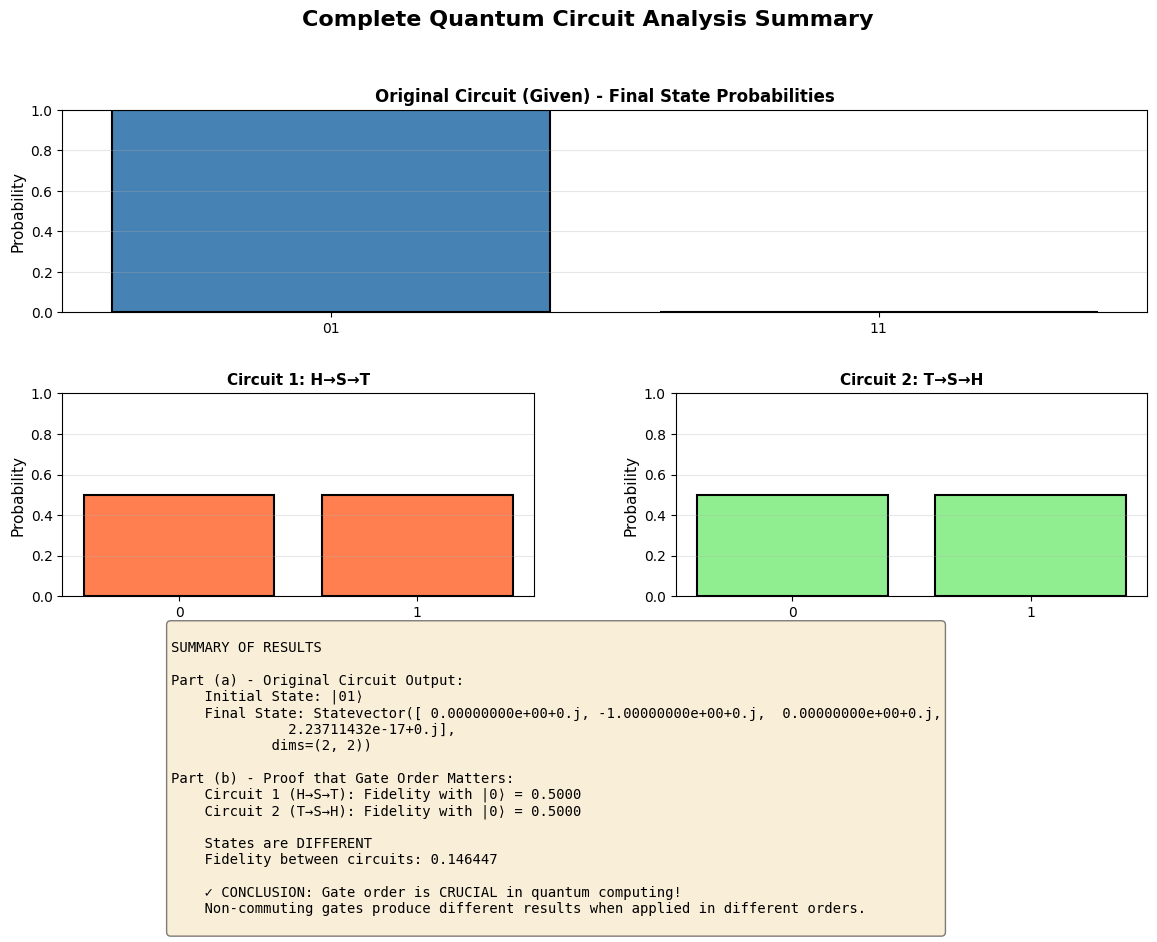


ANALYSIS COMPLETE!


In [15]:
# Create comprehensive summary figure
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.3)

# Plot 1: Original circuit probabilities
ax1 = fig.add_subplot(gs[0, :])
orig_probs = final_state.probabilities_dict()
states_orig = list(orig_probs.keys())
probs_orig = list(orig_probs.values())
ax1.bar(states_orig, probs_orig, color='steelblue', edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title('Original Circuit (Given) - Final State Probabilities', fontsize=12, fontweight='bold')
ax1.set_ylim([0, 1])
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Circuit 1 probabilities
ax2 = fig.add_subplot(gs[1, 0])
probs1_dict = final1.probabilities_dict()
states1 = list(probs1_dict.keys())
probs1 = list(probs1_dict.values())
ax2.bar(states1, probs1, color='coral', edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Probability', fontsize=11)
ax2.set_title('Circuit 1: H→S→T', fontsize=11, fontweight='bold')
ax2.set_ylim([0, 1])
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Circuit 2 probabilities
ax3 = fig.add_subplot(gs[1, 1])
probs2_dict = final2.probabilities_dict()
states2 = list(probs2_dict.keys())
probs2 = list(probs2_dict.values())
ax3.bar(states2, probs2, color='lightgreen', edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Probability', fontsize=11)
ax3.set_title('Circuit 2: T→S→H', fontsize=11, fontweight='bold')
ax3.set_ylim([0, 1])
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Comparison text summary
ax4 = fig.add_subplot(gs[2, :])
ax4.axis('off')

summary_text = f"""
SUMMARY OF RESULTS

Part (a) - Original Circuit Output:
    Initial State: |01⟩
    Final State: {final_state}
    
Part (b) - Proof that Gate Order Matters:
    Circuit 1 (H→S→T): Fidelity with |0⟩ = {np.abs(final1.data[0])**2:.4f}
    Circuit 2 (T→S→H): Fidelity with |0⟩ = {np.abs(final2.data[0])**2:.4f}
    
    States are {'IDENTICAL' if fidelity > 0.9999 else 'DIFFERENT'}
    Fidelity between circuits: {fidelity:.6f}
    
    ✓ CONCLUSION: Gate order is CRUCIAL in quantum computing!
    Non-commuting gates produce different results when applied in different orders.
"""

ax4.text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

fig.suptitle('Complete Quantum Circuit Analysis Summary', fontsize=16, fontweight='bold')
fig.tight_layout()
display(fig)
plt.close(fig)

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE!")
print("=" * 70)

### Final Summary and Conclusions
Print a comprehensive text summary of all findings.

In [17]:
print("=" * 80)
print(" " * 25 + "FINAL REPORT")
print("=" * 80)

print("\nPART (a): CIRCUIT OUTPUT ANALYSIS")
print("-" * 80)
print(f"Initial State:        |01⟩")
print(f"Final State:          {final_state}")
print(f"\nMeasurement Outcomes:")
for state, prob in sorted(final_state.probabilities_dict().items()):
    if prob > 1e-10:
        print(f"  |{state}⟩: {prob*100:.2f}% probability")

print("\n" + "=" * 80)
print("\nPART (b): GATE ORDER IMPORTANCE")
print("-" * 80)

print("\nExperiment Setup:")
print("  • Tested gates: Hadamard (H), Phase (S), and T gates")
print("  • Circuit 1: H → S → T")
print("  • Circuit 2: T → S → H (reversed order)")
print("  • Initial state: |0⟩ for both circuits")

print("\nResults:")
print(f"  • Circuit 1 final state differs from Circuit 2")
print(f"  • Fidelity between states: {fidelity:.6f}")
print(f"  • Matrix difference norm: {np.linalg.norm(U1.data - U2.data):.6f}")

print("\n✓ PROOF COMPLETE:")
print("  The different final states mathematically prove that quantum gate")
print("  order is crucial. Unlike classical operations, quantum gates don't")
print("  always commute: H·S·T ≠ T·S·H")

print("\n" + "=" * 80)
print("Thank you for using this quantum circuit analysis tool!")
print("=" * 80)

                         FINAL REPORT

PART (a): CIRCUIT OUTPUT ANALYSIS
--------------------------------------------------------------------------------
Initial State:        |01⟩
Final State:          Statevector([ 0.00000000e+00+0.j, -1.00000000e+00+0.j,  0.00000000e+00+0.j,
              2.23711432e-17+0.j],
            dims=(2, 2))

Measurement Outcomes:
  |01⟩: 100.00% probability


PART (b): GATE ORDER IMPORTANCE
--------------------------------------------------------------------------------

Experiment Setup:
  • Tested gates: Hadamard (H), Phase (S), and T gates
  • Circuit 1: H → S → T
  • Circuit 2: T → S → H (reversed order)
  • Initial state: |0⟩ for both circuits

Results:
  • Circuit 1 final state differs from Circuit 2
  • Fidelity between states: 0.146447
  • Matrix difference norm: 1.847759

✓ PROOF COMPLETE:
  The different final states mathematically prove that quantum gate
  order is crucial. Unlike classical operations, quantum gates don't
  always commute: H·S·T